In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2l

In [2]:
path = "../data/calipso/"
year = '2006-2014'
exp = 'calipso'


f = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_all.nc",decode_cf = True).load()
f.close()

fon = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_onice.nc",decode_cf = True).load()
fon.close()

foff = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_office.nc",decode_cf = True).load()
foff.close()

fsh = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_all.nc",decode_cf = True).load()
fsh.close()

fshon = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_onice.nc",decode_cf = True).load()
fshon.close()

fshoff = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_office.nc",decode_cf = True).load()
fshoff.close()

In [5]:
path = "../data/am4_cmip/"
year = '20060612-20141231'
exp = 'c96L33_am4p0_qadt_cosp_2010'


fa = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_cmip_all.nc",decode_cf = True).load()
f.close()

faon = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_cmip_onice.nc",decode_cf = True).load()
faon.close()

faoff = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_cmip_office.nc",decode_cf = True).load()
faoff.close()

fash = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_cmip_all.nc",decode_cf = True).load()
fash.close()

fashon = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_cmip_onice.nc",decode_cf = True).load()
fashon.close()

fashoff = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_cmip_office.nc",decode_cf = True).load()
fashoff.close()

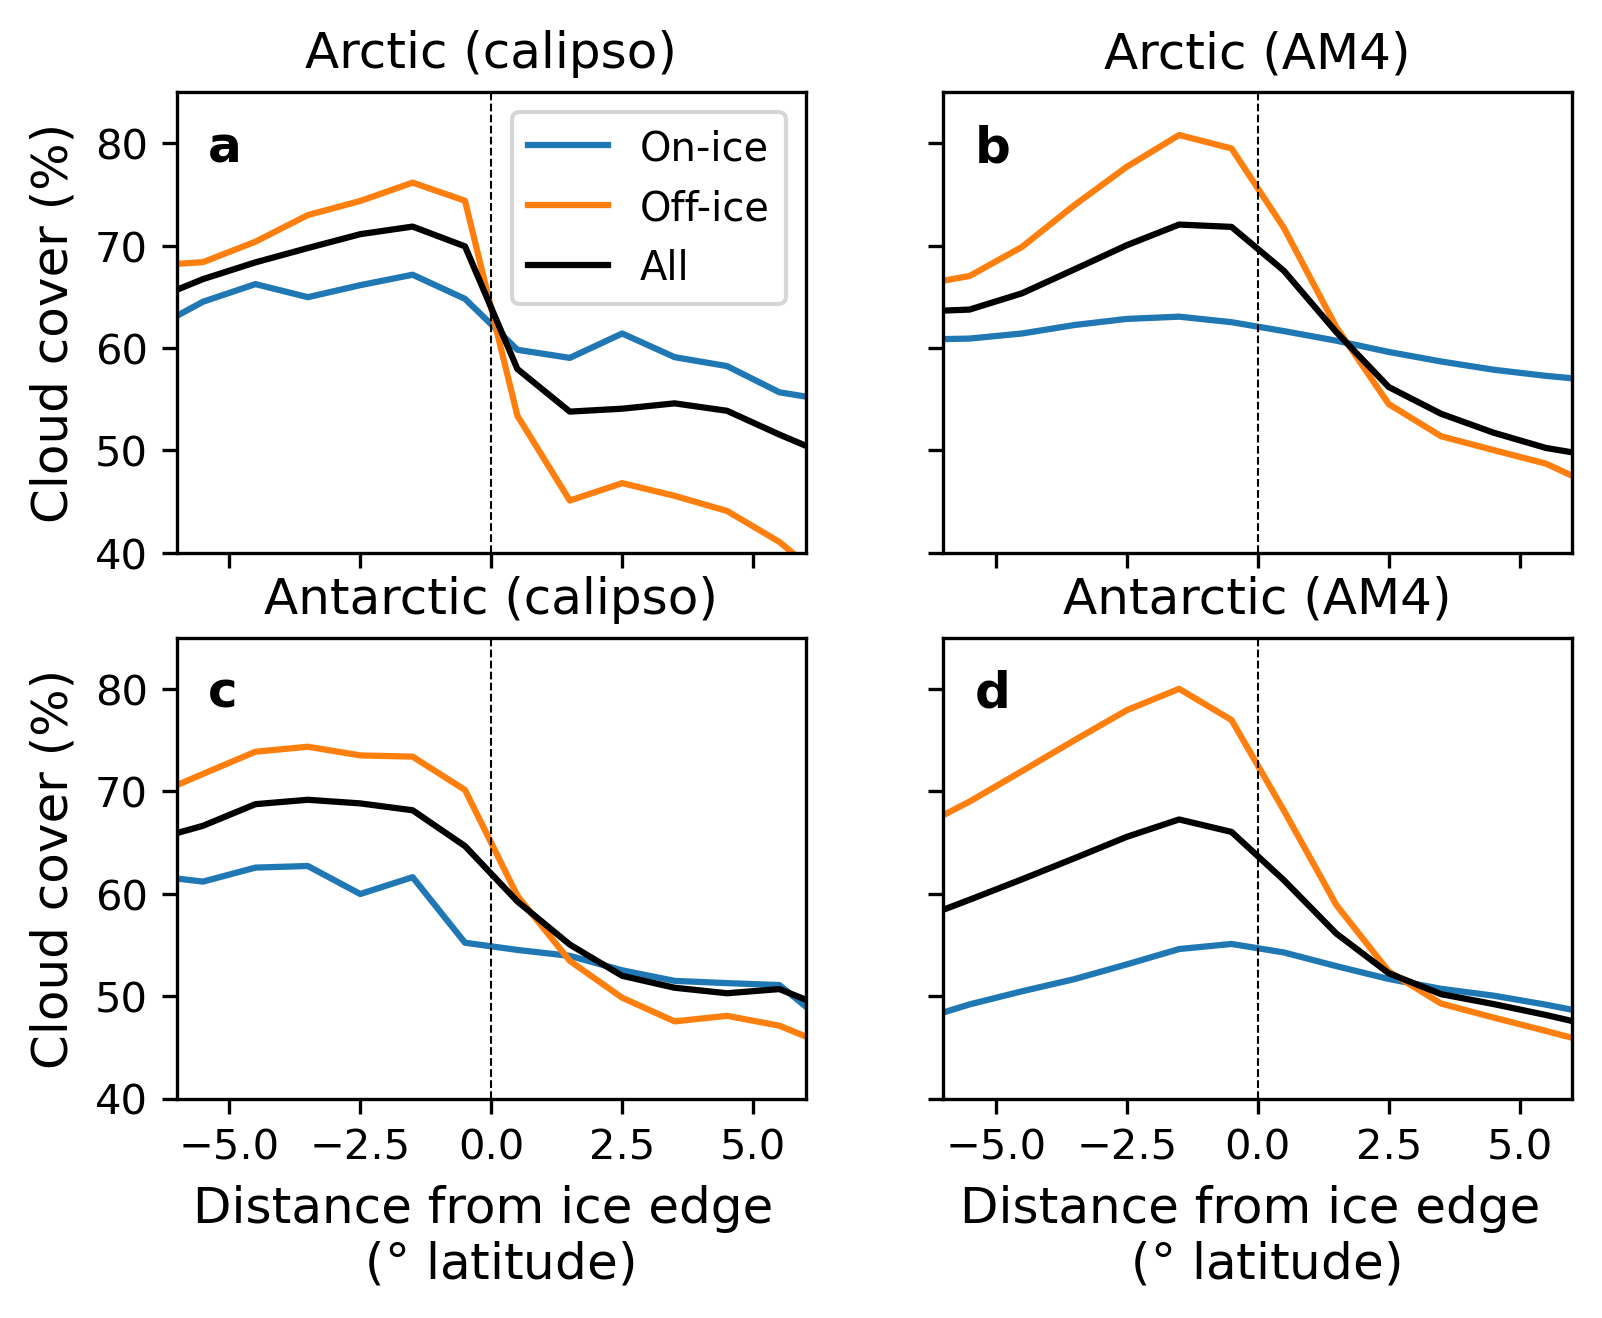

In [7]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, 10/2.54), dpi = 300)

plt.tight_layout()

x = f.distance.values
y = 100.*fon.cllcalipso.isel(season = 0).values
y1 = 100.*foff.cllcalipso.isel(season = 0).values
y2 = 100.*f.cllcalipso.isel(season = 0).values

plt2l(axs[0,0], x, y, y1, y2, title = 'Arctic (calipso)', label = ['On-ice', 'Off-ice', 'All'], 
        xlabel = False,legend = True)

x = -fshon.distance.values
y = 100.*fshon.cllcalipso.isel(season = 1).values
y1 = 100.*fshoff.cllcalipso.isel(season = 1).values
y2 = 100.*fsh.cllcalipso.isel(season = 1).values

plt2l(axs[1,0], x, y, y1, y2, title = 'Antarctic (calipso)')

#----2
x = fa.distance.values
y = faon.cllcalipso.isel(season = 0).values
y1 = faoff.cllcalipso.isel(season = 0).values
y2 = fa.cllcalipso.isel(season = 0).values

plt2l(axs[0,1], x, y, y1, y2, title = 'Arctic (AM4)', 
        xlabel = False, ylabel = '')

x = -fashon.distance.values
y = fashon.cllcalipso.isel(season = 1).values
y1 = fashoff.cllcalipso.isel(season = 1).values
y2 = fash.cllcalipso.isel(season = 1).values

plt2l(axs[1,1], x, y, y1, y2, title = 'Antarctic (AM4)', ylabel = '')

mylabel = np.array((['a','b'],['c','d']))

for i in range(2):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')
        
fig.savefig('Fig6_1d_compare_calipso_am4.png', dpi=fig.dpi, bbox_inches='tight')